In [1]:
! pip install astroNN
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Dropout
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras import utils

from astroNN.datasets import galaxy10
from astroNN.datasets.galaxy10 import galaxy10cls_lookup

     |████████████████████████████████| 9.3 MB 6.8 MB/s 
     |████████████████████████████████| 4.5 MB 31.8 MB/s 
     |████████████████████████████████| 832 kB 48.3 MB/s 
     |████████████████████████████████| 48 kB 5.8 MB/s 
     |████████████████████████████████| 4.0 MB 46.6 MB/s 
  Created wheel for astroNN: filename=astroNN-1.0.1-py3-none-any.whl size=9284595 sha256=1ec977ec1dba338e22e1de3a7a4a7bd8084fd22990e19946399d95d14ea96861
  Stored in directory: /root/.cache/pip/wheels/26/a4/7e/4cbf2a7f9cd51929da9d09345e8cd37c647b54825a1314dd2d
Successfully built astroNN
WARNING! APOGEE environment variable SDSS_LOCAL_SAS_MIRROR not set
WARNING! Gaia environment variable GAIA_TOOLS_DATA not set


In [11]:
from tensorflow.keras.optimizers import SGD,Adam

In [2]:
images, labels = galaxy10.load_data()

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

features = ['Disk, Face-on, No Spiral', 'Smooth, Completely round', 'Smooth, in-between round', 'Smooth, Cigar shaped', 'Disk, Edge-on, Rounded Bulge', 'Disk, Edge-on, Boxy Bulge', 
            'Disk, Edge-on, No Bulge','Disk, Face-on, Tight Spiral', 'Disk, Face-on, Medium Spiral', 'Disk, Face-on, Loose Spiral']

x_train = x_train / 255.0
x_test = x_test / 255.0

Galaxy10.h5: 100%|█████████▉| 210M/210M [00:06<00:00, 52.7MB/s]

Downloaded Galaxy10 successfully to /root/.astroNN/datasets/Galaxy10.h5


Galaxy10.h5: 210MB [00:08, 25.8MB/s]                           


In [3]:
x_train.shape, x_test.shape

((17428, 69, 69, 3), (4357, 69, 69, 3))

In [4]:
df = pd.DataFrame(data=labels)

counts = df.value_counts().sort_index()
print(counts)

0    3461
1    6997
2    6292
3     349
4    1534
5      17
6     589
7    1121
8     906
9     519
dtype: int64


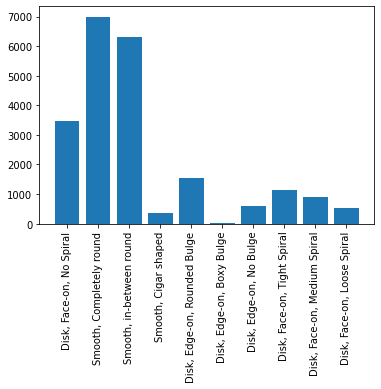

In [9]:
def class_distribution(x, y, labels):
    fig, ax = plt.subplots()
    ax.bar(x, y)
    ax.set_xticklabels(labels, rotation=90)
    plt.show()
    
class_distribution(features, counts, features)

#Base-Line Model for LENet

In [5]:
model = Sequential()

# Baseline model to compare to LeNet-5
model.add(Flatten(input_shape=(69, 69, 3)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model_optimizer = Adam(lr=0.001)

model.compile(optimizer=model_optimizer, loss='sparse_categorical_crossentropy', metrics=["accuracy"])
reduceLR = ReduceLROnPlateau(monitor='accuracy', factor=.001, patience=1, min_delta=0.01, mode="auto")
lol = model.fit(x_train, y_train, epochs=50, callbacks=[reduceLR])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
545/545 [==============================] - 10s 18ms/step - loss: 1.5243 - accuracy: 0.4053 - lr: 0.0010
Epoch 2/50
545/545 [==============================] - 12s 22ms/step - loss: 1.1333 - accuracy: 0.5866 - lr: 0.0010
Epoch 3/50
545/545 [==============================] - 11s 21ms/step - loss: 1.0186 - accuracy: 0.6356 - lr: 0.0010
Epoch 4/50
545/545 [==============================] - 7s 13ms/step - loss: 0.9618 - accuracy: 0.6580 - lr: 0.0010
Epoch 5/50
545/545 [==============================] - 7s 13ms/step - loss: 0.9153 - accuracy: 0.6772 - lr: 0.0010
Epoch 6/50
545/545 [==============================] - 7s 13ms/step - loss: 0.8831 - accuracy: 0.6872 - lr: 0.0010
Epoch 7/50
545/545 [==============================] - 7s 13ms/step - loss: 0.8483 - accuracy: 0.7039 - lr: 1.0000e-06
Epoch 8/50
545/545 [==============================] - 7s 13ms/step - loss: 0.8187 - accuracy: 0.7153 - lr: 1.0000e-06
Epoch 9/50
545/545 [==============================] - 7s 13ms/step - loss: 0.

In [16]:
model2 = Sequential()

# LeNet-5 conv-net architecture
model2.add(Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), activation='tanh', input_shape=(69,69,3)))
model2.add(AveragePooling2D(pool_size=(2,2), strides=(2,2)))
model2.add(Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), activation='tanh'))
model2.add(AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model2.add(Flatten())
model2.add(Dense(units=120, activation='tanh'))
model2.add(Dense(units=84, activation='tanh'))
model2.add(Dense(units=10, activation='softmax'))

model_optimizer = Adam(lr=0.001)

reduceLR = ReduceLROnPlateau(monitor='accuracy', factor=.001, patience=1, min_delta=0.01, mode="auto")

model2.compile(optimizer=model_optimizer, loss='sparse_categorical_crossentropy', metrics=["accuracy"])
batch_size= 100
epochs=50
learn_rate=.001
sgd=SGD(lr=learn_rate,momentum=.9,nesterov=False)
adam=Adam(lr=learn_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
#model2.fit(x_train, y_train, epochs=10, callbacks=[reduceLR])
model2.fit(x_train, y_train,batch_size=100, epochs=10, verbose=1, callbacks=[reduceLR], validation_data=(x_test, y_test)) 
#model.fit_generator(train_generator.flow(x_train, y_train, batch_size= batch_size),epochs = epochs, steps_per_epoch = len(x_train)//batch_size, validation_data = val_generator.flow(x_test, y_test, batch_size = batch_size), validation_steps =10, callbacks=[reduceLR], verbose = 1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
175/175 [==============================] - 73s 415ms/step - loss: 1.4642 - accuracy: 0.4176 - val_loss: 1.2041 - val_accuracy: 0.5878 - lr: 0.0010
Epoch 2/10
175/175 [==============================] - 71s 408ms/step - loss: 0.9904 - accuracy: 0.6477 - val_loss: 0.9413 - val_accuracy: 0.6615 - lr: 0.0010
Epoch 3/10
175/175 [==============================] - 71s 404ms/step - loss: 0.8398 - accuracy: 0.6920 - val_loss: 0.8181 - val_accuracy: 0.7051 - lr: 0.0010
Epoch 4/10
175/175 [==============================] - 71s 403ms/step - loss: 0.7553 - accuracy: 0.7238 - val_loss: 0.7642 - val_accuracy: 0.7250 - lr: 0.0010
Epoch 5/10
175/175 [==============================] - 71s 404ms/step - loss: 0.7003 - accuracy: 0.7448 - val_loss: 0.7704 - val_accuracy: 0.7294 - lr: 0.0010
Epoch 6/10
175/175 [==============================] - 71s 405ms/step - loss: 0.6484 - accuracy: 0.7607 - val_loss: 0.7220 - val_accuracy: 0.7425 - lr: 0.0010
Epoch 7/10
175/175 [==============================] 

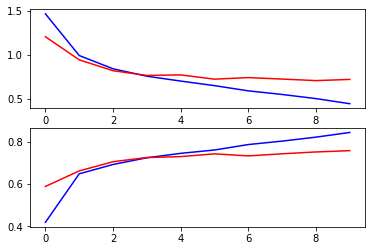

In [20]:
import matplotlib.pyplot as plt
f,ax=plt.subplots(2,1)
ax[0].plot(model2.history.history['loss'],color='b',label='Training Loss')
ax[0].plot(model2.history.history['val_loss'],color='r',label='Validation Loss')
ax[1].plot(model2.history.history['accuracy'],color='b',label='Training  Accuracy')
ax[1].plot(model2.history.history['val_accuracy'],color='r',label='Validation Accuracy')


#----END ------#